In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.set_index(['Month'], inplace=True)

In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize'] = (10,5)

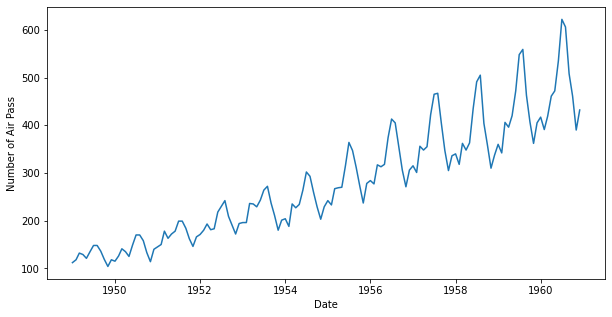

In [13]:
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Number of Air Pass")
plt.show()

In [14]:
roll_mean = df.rolling(window=12).mean()
roll_std = df.rolling(window=12).std()

In [15]:
roll_mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [16]:
roll_mean[0:20]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


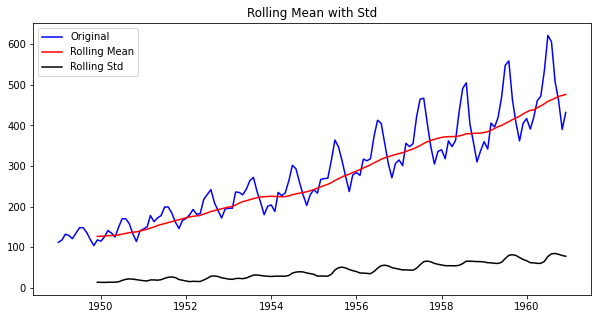

In [17]:
org = plt.plot(df, color = "blue", label = 'Original')
mean = plt.plot(roll_mean, color = "red", label = 'Rolling Mean')
std = plt.plot(roll_std, color = "k", label = 'Rolling Std')
plt.legend(loc = "best")
plt.title("Rolling Mean with Std")
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

https://www.statsmodels.org/stable/index.html

In [19]:
print('Result of DFT')
dftest = adfuller(df['#Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','No. of observations'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Result of DFT
Test Statistic            0.815369
p-value                   0.991880
#Lags used               13.000000
No. of observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [20]:
def test_stationarity(timeseries):

  #to determine rolliing statistics
  movingAvg = timeseries.rolling(window=12).mean()
  movingStd = timeseries.rolling(window=12).std()

  #plotting rolling stats:
  org = plt.plot(timeseries, color = "blue", label = 'Original')
  mean = plt.plot(movingAvg, color = "red", label = 'Rolling mean')
  std = plt.plot(movingStd, color = "k", label = 'Rolling std')
  plt.legend(loc = 'best')
  plt.title('Rolling mean and std')
  plt.show()

  #DFT:
  print('Result of DFT')
  dftest = adfuller(timeseries['#Passengers'])
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','No. of observations'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

  print(dfoutput)

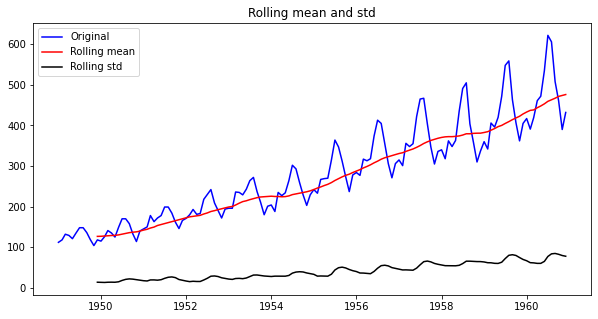

Result of DFT
Test Statistic            0.815369
p-value                   0.991880
#Lags used               13.000000
No. of observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [21]:
test_stationarity(df)

Let's try with Differencing

In [22]:
df_diff = df - df.shift(1)

In [23]:
df_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [24]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [25]:
df_diff = df - df.shift(12)

In [26]:
df_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,47.0
1960-09-01,45.0
1960-10-01,54.0


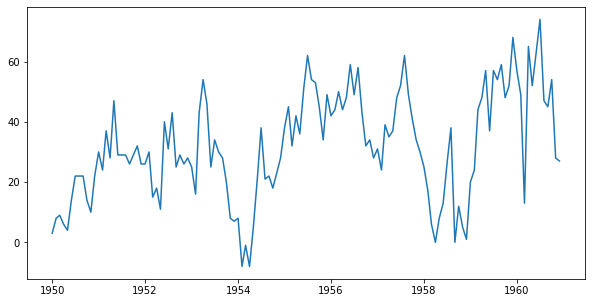

In [27]:
plt.plot(df_diff)
plt.show()

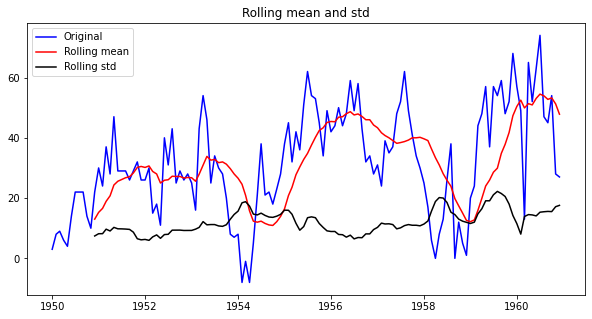

Result of DFT


MissingDataError: exog contains inf or nans

In [28]:
test_stationarity(df_diff)

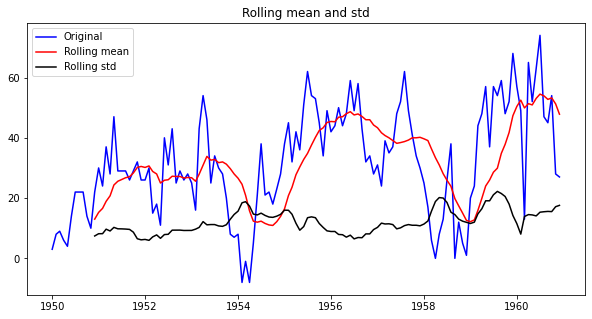

Result of DFT
Test Statistic           -3.383021
p-value                   0.011551
#Lags used                1.000000
No. of observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [29]:
test_stationarity(df_diff.dropna())

The Data is Stationary now

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

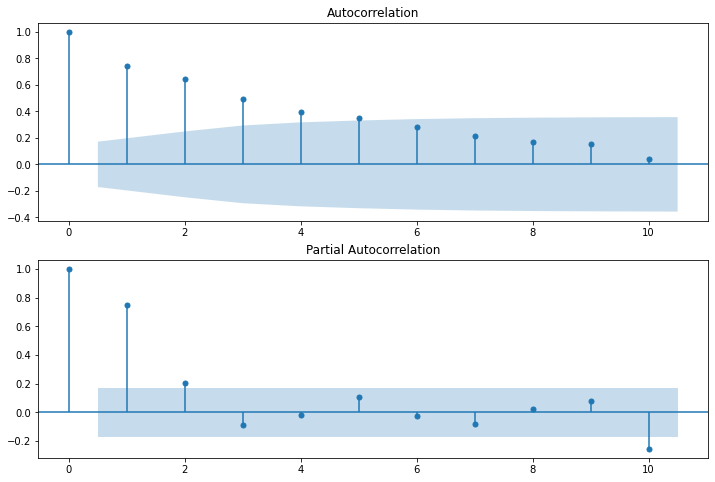

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff.iloc[13:], lags = 10, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff.iloc[13:], lags = 10, ax = ax2)

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = ARIMA(df_diff.dropna(),order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -508.171
Method:                       css-mle   S.D. of innovations             11.703
Date:                Sat, 16 Oct 2021   AIC                           1024.342
Time:                        15:42:50   BIC                           1035.843
Sample:                    02-01-1950   HQIC                          1029.016
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1770      0.781      0.227      0.821      -1.354       1.708
ar.L1.D.#Passengers    -0.2991      0.388     -0.770      0.441      -1.060       0.462
ma.L1.D.#Passengers    -0.0097      0.419     -0.023      0.982      -0.830       0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3434           +0.0000j            3.3434            0.5000
MA.1          103.2749           +0.0000j          103.2749            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

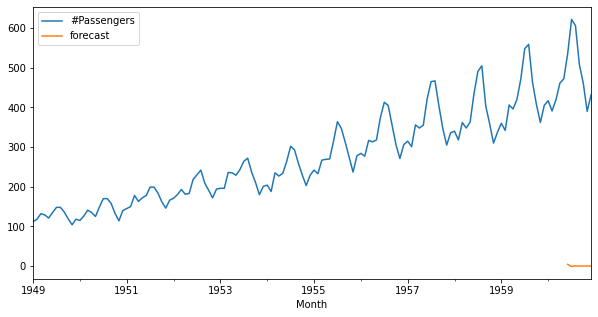

In [39]:
df['forecast'] = model_fit.predict(start = 125, end= 140, dynamic = True)
df[['#Passengers','forecast']].plot()

In [40]:
import statsmodels.api as sm

In [41]:
model = sm.tsa.statespace.SARIMAX(df['#Passengers'], order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Month'>

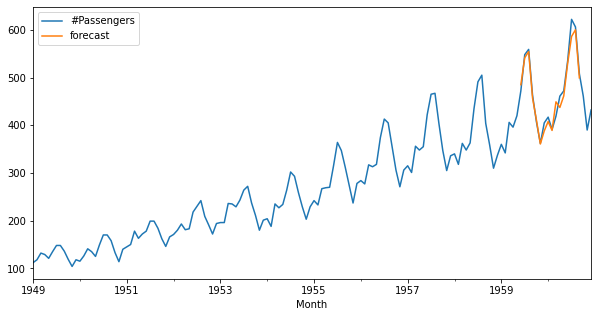

In [42]:
df['forecast'] = results.predict(start = 125, end= 140, dynamic = True)
df[['#Passengers','forecast']].plot()

Assignment:
    1. To predict the no. of Pass for next 2 years